Data

In [ ]:
import zipfile
import pandas as pd

# Column names based on KDD dataset documentation
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "label", "extra"
]

# Unzipping the files
train_zip_path = '/content/KDDTrain+.txt (2).zip'
test_zip_path = '/content/KDDTest+.txt (4).zip'

with zipfile.ZipFile(train_zip_path, 'r') as train_zip:
    train_zip.extractall('/path/to/content/KDDTrain+.txt (2).zip')
with zipfile.ZipFile(test_zip_path, 'r') as test_zip:
    test_zip.extractall('/path/to/content/KDDTest+.txt (4).zip')

# Load the dataset with column names
train_data = pd.read_csv('/content/KDDTrain+.txt (2).zip', header=None, names=column_names)
test_data = pd.read_csv('/content/KDDTest+.txt (4).zip', header=None, names=column_names)


In [ ]:
# Define binary target labels (normal = 0, attack = 1)
train_data['label'] = train_data['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_data['label'] = test_data['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Separate features and target
X_train = train_data.drop(columns=['label', 'extra'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label', 'extra'])
y_test = test_data['label']


In [ ]:
# Check class distribution and show column names
print("Column names:", X_train.columns.tolist())
print("Class distribution in y_train:", y_train.value_counts().to_dict())
print("Class distribution in y_test:", y_test.value_counts().to_dict())


Column names: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
Class distribution in y_train: {0: 67343, 1: 58630}
Class distribution in y_test: {1: 12833, 0: 9711}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify and encode categorical features
cat_features = ['protocol_type', 'service', 'flag']
for col in cat_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

# Predictions and evaluation in percentage format
y_pred_ada = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada) * 100
ada_precision = precision_score(y_test, y_pred_ada) * 100
ada_recall = recall_score(y_test, y_pred_ada) * 100
ada_f1 = f1_score(y_test, y_pred_ada) * 100

print("AdaBoost Results:")
print(f"Accuracy: {ada_accuracy:.2f}%")
print(f"Precision: {ada_precision:.2f}%")
print(f"Recall: {ada_recall:.2f}%")
print(f"F1 Score: {ada_f1:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 78.25%
Precision: 96.72%
Recall: 63.95%
F1 Score: 77.00%


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions and evaluation in percentage format
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100
xgb_precision = precision_score(y_test, y_pred_xgb) * 100
xgb_recall = recall_score(y_test, y_pred_xgb) * 100
xgb_f1 = f1_score(y_test, y_pred_xgb) * 100

print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.2f}%")
print(f"Precision: {xgb_precision:.2f}%")
print(f"Recall: {xgb_recall:.2f}%")
print(f"F1 Score: {xgb_f1:.2f}%")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:09:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 80.09%
Precision: 96.78%
Recall: 67.26%
F1 Score: 79.36%


In [ ]:
from sklearn.metrics import classification_report

# Define class names
class_names = ['normal', 'attack']

# AdaBoost Classification Report
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=class_names))

# XGBoost Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))


AdaBoost Classification Report:
              precision    recall  f1-score   support

      normal       0.67      0.97      0.79      9711
      attack       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544

XGBoost Classification Report:
              precision    recall  f1-score   support

      normal       0.69      0.97      0.81      9711
      attack       0.97      0.67      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544



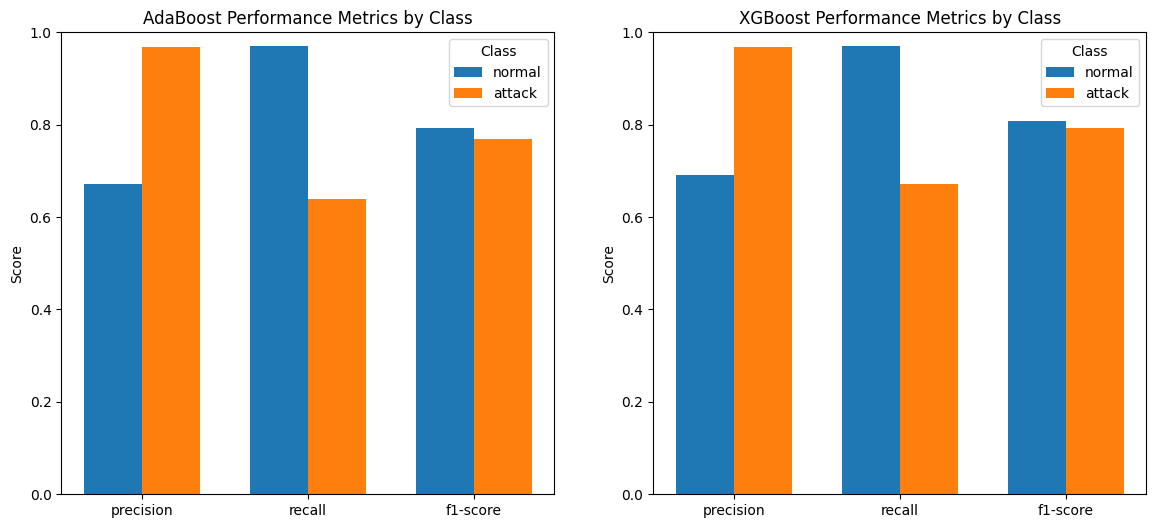

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report data for AdaBoost and XGBoost
ada_report = classification_report(y_test, y_pred_ada, target_names=class_names, output_dict=True)
xgb_report = classification_report(y_test, y_pred_xgb, target_names=class_names, output_dict=True)

# Extract scores for precision, recall, and F1-score
metrics = ['precision', 'recall', 'f1-score']
classes = ['normal', 'attack']
ada_scores = [[ada_report[class_name][metric] for metric in metrics] for class_name in classes]
xgb_scores = [[xgb_report[class_name][metric] for metric in metrics] for class_name in classes]

# Plotting
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# AdaBoost
for i, class_name in enumerate(classes):
    ax[0].bar(x + i * width, ada_scores[i], width, label=class_name)
ax[0].set_xticks(x + width / 2)
ax[0].set_xticklabels(metrics)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Score')
ax[0].set_title('AdaBoost Performance Metrics by Class')
ax[0].legend(title="Class")

# XGBoost
for i, class_name in enumerate(classes):
    ax[1].bar(x + i * width, xgb_scores[i], width, label=class_name)
ax[1].set_xticks(x + width / 2)
ax[1].set_xticklabels(metrics)
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Score')
ax[1].set_title('XGBoost Performance Metrics by Class')
ax[1].legend(title="Class")

plt.show()


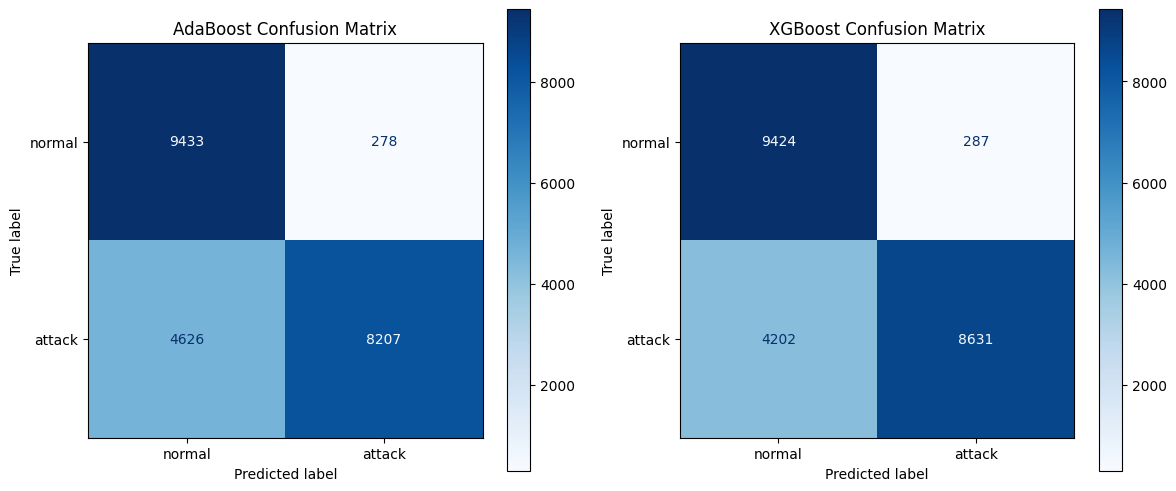

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices for AdaBoost and XGBoost
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# AdaBoost Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada, display_labels=class_names, cmap='Blues', ax=ax[0])
ax[0].set_title("AdaBoost Confusion Matrix")

# XGBoost Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=class_names, cmap='Blues', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings


# Load the datasets
train_data_path = '/content/KDDTrain+.txt (2).zip'
test_data_path = '/content/KDDTest+.txt (4).zip'

# Column names for the dataset
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
                'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
                'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
                'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
                'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate', 'label', 'difficulty']

# Load the training and test datasets
train_df = pd.read_csv(train_data_path, names=column_names)
test_df = pd.read_csv(test_data_path, names=column_names)

# Select 10 attributes for X (excluding the attack label)
X_columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
             'dst_bytes', 'land', 'hot', 'logged_in', 'count']

# Select 10 attributes for y (including the attack label and other attributes)
y_columns = ['label', 'num_failed_logins', 'num_compromised', 'root_shell', 'num_root',
             'num_file_creations', 'num_shells', 'num_access_files', 'srv_count', 'srv_serror_rate']

# Separate features (X) and target (y)
X_train = train_df[X_columns]
y_train = train_df[y_columns]
X_test = test_df[X_columns]
y_test = test_df[y_columns]

# Handle categorical variables with one-hot encoding and numeric features with scaling
categorical_features = ['protocol_type', 'service', 'flag']
numeric_features = list(set(X_columns) - set(categorical_features))

# Label encode the attack type in the y dataset using .loc to avoid warnings
label_encoder = LabelEncoder()
y_train.loc[:, 'label'] = label_encoder.fit_transform(y_train['label'])

# Handle unseen labels in the test set by including them in the label encoder classes
y_test_unseen_labels = np.setdiff1d(y_test['label'].unique(), label_encoder.classes_)
label_encoder.classes_ = np.append(label_encoder.classes_, y_test_unseen_labels)

# Transform the test labels using the updated label encoder
y_test.loc[:, 'label'] = label_encoder.transform(y_test['label'])

# Preprocessing pipeline for X: scaling for numeric data and one-hot encoding for categorical data
preprocessor_X = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# Preprocessing pipeline for y: scaling the numeric attributes
numeric_y_columns = y_columns[1:]
preprocessor_y = StandardScaler()

# Apply the preprocessing to y (scaling the numeric columns)
y_train_scaled = preprocessor_y.fit_transform(y_train[numeric_y_columns])
y_test_scaled = preprocessor_y.transform(y_test[numeric_y_columns])

# Combine the scaled y columns with the encoded attack label (concatenate horizontally)
y_train_final = np.concatenate([y_train_scaled, y_train[['label']]], axis=1)
y_test_final = np.concatenate([y_test_scaled, y_test[['label']]], axis=1)

# Define AdaBoost model
ada_model = Pipeline(steps=[
    ('preprocessor', preprocessor_X),
    ('classifier', AdaBoostClassifier(n_estimators=50, random_state=42))
])

# Define XGBoost model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor_X),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train the AdaBoost classifier on X and multi-class y (y_train_final)
ada_model.fit(X_train, y_train_final[:, -1].astype(int))
y_pred_ada = ada_model.predict(X_test)

# Train the XGBoost classifier on X and multi-class y (y_train_final)
xgb_model.fit(X_train, y_train_final[:, -1].astype(int))
y_pred_xgb = xgb_model.predict(X_test)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Evaluation of AdaBoost
ada_accuracy = accuracy_score(y_test_final[:, -1].astype(int), y_pred_ada) * 100
print("AdaBoost Classifier Report:\n", classification_report(y_test_final[:, -1].astype(int), y_pred_ada))
print(f"AdaBoost Accuracy: {ada_accuracy:.2f}%")

# Evaluation of XGBoost
xgb_accuracy = accuracy_score(y_test_final[:, -1].astype(int), y_pred_xgb) * 100
print("XGBoost Classifier Report:\n", classification_report(y_test_final[:, -1].astype(int), y_pred_xgb))
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:50:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AdaBoost Classifier Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       359
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00      1231
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00       141
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        18
           9       0.57      1.00      0.73      4657
          10       0.00      0.00      0.00        73
          11       0.65      0.97      0.78      9711
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00        41
          15       0.00      0.00      0.00       157
          16       0.00      0.00      0.00        1

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert predictions back to original class labels
y_pred_ada_labels = label_encoder.inverse_transform(y_pred_ada.astype(int))
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb.astype(int))
y_test_labels = label_encoder.inverse_transform(y_test_final[:, -1].astype(int))

# Evaluation of AdaBoost
ada_accuracy = accuracy_score(y_test_labels, y_pred_ada_labels) * 100
print("AdaBoost Classifier Report:\n", classification_report(y_test_labels, y_pred_ada_labels))
print(f"AdaBoost Accuracy: {ada_accuracy:.2f}%")

# Evaluation of XGBoost
xgb_accuracy = accuracy_score(y_test_labels, y_pred_xgb_labels) * 100
print("XGBoost Classifier Report:\n", classification_report(y_test_labels, y_pred_xgb_labels))
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")




AdaBoost Classifier Report:
                  precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       737
           back       0.00      0.00      0.00       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
     httptunnel       0.00      0.00      0.00       133
           imap       0.00      0.00      0.00         1
        ipsweep       0.00      0.00      0.00       141
           land       0.00      0.00      0.00         7
     loadmodule       0.00      0.00      0.00         2
       mailbomb       0.00      0.00      0.00       293
          mscan       0.00      0.00      0.00       996
       multihop       0.00      0.00      0.00        18
          named       0.00      0.00      0.00        17
        neptune       0.57      1.00      0.73      4657
           nmap       0.00      0.00      0.00        73
 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Define plot style
sns.set(style="whitegrid")


# Plot Accuracy Comparison
model_names = ['AdaBoost', 'XGBoost']
accuracies = [ada_accuracy, xgb_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of AdaBoost and XGBoost")
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontweight="bold")
plt.show()
